In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Non-relativistic White Dwarf:


https://arxiv.org/pdf/nucl-th/0309041.pdf


https://arxiv.org/pdf/astro-ph/0506417.pdf


EoS: $\gamma=\frac{5}{3}$ $$P=k\rho^{\gamma}$$

where matter density is given by $\rho[gm/cm^3]$, we can transform $\rho[gm/cm^3]$ to $\rho[erg/cm^3]$ or $\rho[MeV/fm^3]$ depending on our needs.

$$k=\frac{h^2}{20m_e}\left(\frac{3}{\pi}\right)^{2/3}\left(\frac{N_o}{\mu_e}\right)^{5/3} [erg^2 s^2/gm^{8/3}]$$


Using the values of planck constant $(h)$, avogadro constant $(N_O)$and electron mass $(m_e)$ in cgs unit. Point to note that $N_O$ is defined as $6.023\times 10^{23} /mole$


$$P\approx 1.004\times 10^{13}\left(\frac{\rho}{\mu_e}\right)^{5/3}[dyne/cm^2]$$




- Complete ionozation: $\mu_e=\frac{2}{1+X_H}$  and Hydrogen ionization fraction  $X_H\approx 0.6$ that gives

$$\mu_e=1.25$$





- TOV equation in the Newtonian limit:

$$\frac{dP}{dr}=-\frac{G\epsilon(r) m(r)}{c^2r^2}$$

$$\frac{d{m}}{dr}=\frac{4\pi r^2\epsilon(r)}{c^2}$$

Introducing $R_o=\frac{2GM}{c^2}$ and $\bar{m}(r)=\frac{m(r)}{M_{\odot}}$ and re-writing the above two odes we get,

$$\frac{dP}{dr}=-\frac{R_O}{2r^2}\left(\frac{P}{k}\right)^{1/\gamma}\bar{m}\tag{2}$$

$$\frac{d\bar{m}}{dr}=\frac{4\pi r^2}{M_\odot c^2}\left(\frac{P}{k}\right)^{1/\gamma}\tag{3}$$

- For the given central density we can solve these coupled odes for mass and radius.


- Central pressure inside a White-Dwarf: $P_c\approx 2.2\times 10^{22}[dyne/cm^2]$ and $\rho_c\approx  10^{5.4}[gm/cm^3]$

- Derivation of TOV Equation:

https://arxiv.org/pdf/2010.02859.pdf

 # Approach 1

In [2]:
mu_e=1.25
gamma=5/3

rho_c=10**5.4 #gm/cm^3
M_sun=1.98*1e33 #gm
c=3*1e10 #cm/s
R_o=2.96*1e5 #cm , Schwarchild radius
m_e=9.1*1e-28 #gm

h=6.626*1e-27 #erg-sec
N_0=(6.023*1e23) #gm^-1
G = 6.67259e-11 # m^3/(kg*s)


In [3]:
k_NR=(h**2/(20*m_e))*(3/np.pi)**(2/3)*(N_0/mu_e)**gamma
k_NR


6927616108503.607

$$\frac{MeV}{fm^3}=1.6\times 10^{33} [dyne/cm^2]$$


$$1 eV= 1.6\times 10^{-19} \,J=1.6\times 10^{-12} \,erg$$
$$1 J=10^7 erg$$


$$\frac{ 10^6 eV}{10^{-39}cm^3}=1.6\times 10^{33} [dyne/cm^2]$$


$$\frac{ 10^6 \times 1.6\times 10^{-12} \,erg}{10^{-39}cm^3}=1.6\times 10^{33} [dyne/cm^2]$$

$$\frac{erg}{cm^3}= [dyne/cm^2]$$

Then $$MeV/fm^3=1.777\times 10^{12} \frac{gm}{cm^3}$$

$$\frac{gm}{cm^3}=\frac{MeV/fm^3}{1.777\times 10^{12}}= \frac{1.6\times 10^{33}}{ {1.777\times 10^{12}}}=\frac{1.6}{1.77}\times 10^{21}[dyne/cm^2]$$

In [4]:
factor=(1.6/1.77)*1e21 # conversion factor: gm/cm^3 to dyne/cm^2

In [5]:
density=np.linspace(1e3,1e5,1000) #gm/cm^3

In [6]:
def EoS(rho):
    P=k_NR*rho**gamma #erg/cm^3
    return P #dyne/cm^2

P_c=EoS(rho_c)
P_NR=EoS(density)
P_c


6.927616108503622e+21

In [7]:
def tov_eq(r,y):
    
    P=y[0]
    m_bar=y[1]
    
    const_1=R_o/(2*r**2)
    const_2=4*np.pi*r**2/(M_sun*c**2)
    
    term=P/k_NR
    
    dP_dr=-const_1*term**(1/gamma)*m_bar
    dP_dr=dP_dr*factor #has dimension (dyne/cm^2)/cm
    
    dm_bar_dr=const_2*term**(1/gamma)
    dm_bar_dr=dm_bar_dr*(c**2) # has dimension 1/cm
    
    return [dP_dr,dm_bar_dr]

In [8]:
y0=[P_c,0]
    
# solving the differential equations

r=np.linspace(0.1, 10000, 1000) #km
r=r*1e5 #cm

sol=solve_ivp(tov_eq, t_span=(r[0],r[-1]), y0=y0, t_eval=r,method='RK23')

https://scicomp.stackexchange.com/questions/40130/solve-ivp-from-scipy-does-not-integrate-the-whole-range-of-tspan

In [9]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+04  1.011e+06 ...  9.990e+08  1.000e+09]
        y: [[ 6.928e+21  6.928e+21 ...  1.825e+21  1.820e+21]
            [ 0.000e+00  5.491e-10 ...  3.377e-01  3.384e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 83
     njev: 0
      nlu: 0

In [10]:
P=sol.y[0]   
m_bar=sol.y[1]


#plt.plot(r/1e5,m_bar)

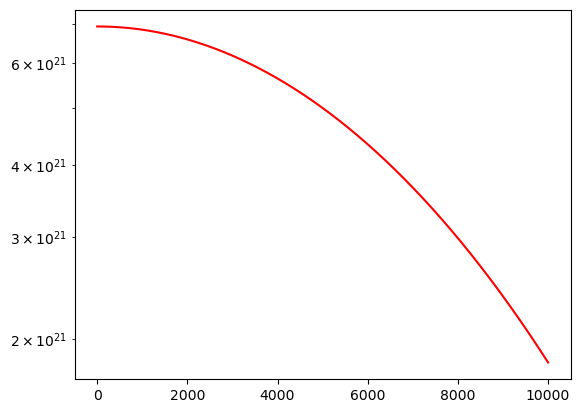

In [11]:
plt.semilogy()
plt.plot(r/1e5, P,color="red")

Text(0.5, 0, '')

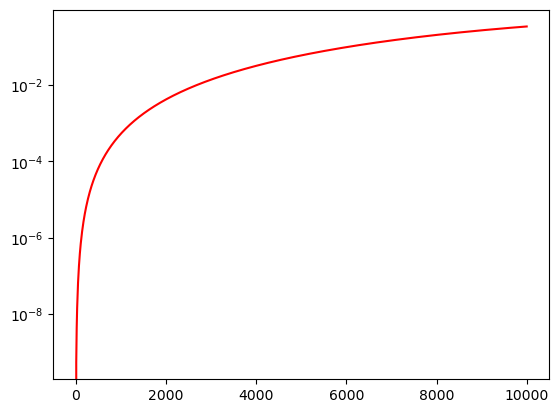

In [12]:
plt.semilogy()
plt.plot(r/1e5, m_bar, color="red")
plt.xlabel('')

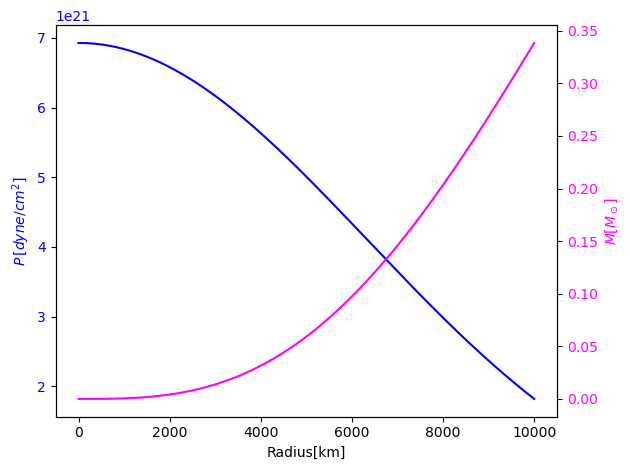

In [13]:
fig, ax1 = plt.subplots()

#color = 'tab:red'
ax1.set_xlabel('Radius[km]')
ax1.set_ylabel(r'$P\,[dyne/cm^2]$', color="blue")
ax1.plot(r/1e5, P, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel(r'$M[M_\odot]$', color="magenta")  # we already handled the x-label with ax1
ax2.plot(r/1e5,m_bar, color="magenta")
ax2.tick_params(axis='y', labelcolor="magenta")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("white_dwarf_nonrelativistic.pdf")
plt.show()

In [14]:
#solve using odeint routine


def tov_eq(y,r):
    P=y[0]
    m_bar=y[1]
    
    const_1=R_o/(2*r**2)
    const_2=4*np.pi*r**2/(M_sun*c**2)
    
    term=P/k_NR
    
    dP_dr=-const_1*term**(1/gamma)*m_bar
    dP_dr=dP_dr*factor #both side has dimension (dyne/cm^2)/cm
    
    dm_bar_dr=const_2*(term)**(1/gamma)
    dm_bar_dr=dm_bar_dr*c**2 #both side has dimension 1/cm

    # solving the differential equations
    
    return [dP_dr,dm_bar_dr]

In [15]:
r =np.arange(0.1, 9000,1000) #km
r=r*1e5 #cm
    
P = np.zeros_like(r)
m_bar = np.zeros_like(r)


''' Initial conditions: y(0)=[P_c,0]'''

y0=[P_c,0]

#or

'''for i in range(len(r)-1):
    dr= [r[i],r[i+1]]
    sol = odeint(tov_eq,y0,dr)

    #store results
    P[i+1]=sol[-1][0]
    m_bar[i+1]=sol[-1][1] 

    #adjust initial conditions for next loop
    y0=sol[-1]'''
    
    
#or

sol=odeint(tov_eq,y0,r)
# solutions:
P=sol[:,0]
m_bar=sol[:,1]



Text(0, 0.5, '$P[dyne/cm^2]$')

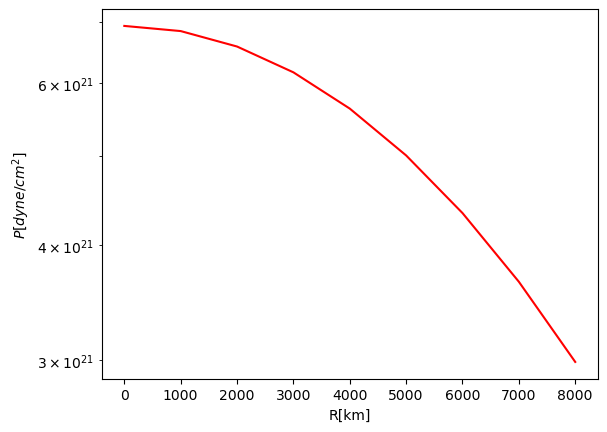

In [16]:
plt.semilogy()
plt.plot(r/1e5,P,color="red")
plt.xlabel("R[km]")
plt.ylabel(r"$P[dyne/cm^2]$")

Text(0, 0.5, '$M[M_\\odot]$')

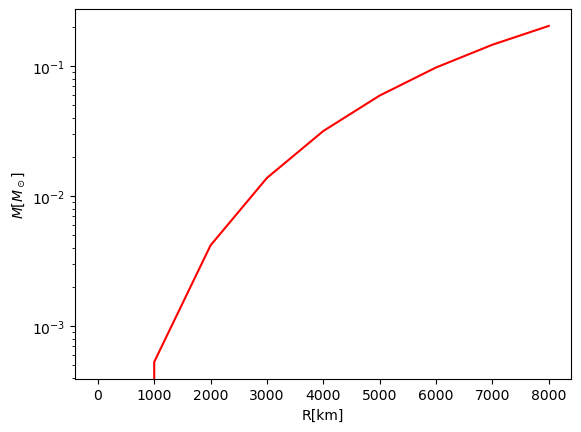

In [17]:
plt.semilogy()
plt.plot(r/1e5,m_bar,color="red")
plt.xlabel("R[km]")
plt.ylabel(r'$M[M_\odot]$')

# Relativistic White Dwarf:


EoS: $\gamma=\frac{4}{3}$ $$P=k\rho^{\gamma}$$

where matter density is given by $\rho[gm/cm^3]$, we can transform $\rho[gm/cm^3]$ to $\rho[erg/cm^3]$ or $\rho[MeV/fm^3]$ depending on our needs.

$$k=\frac{hc}{8}\left(\frac{3}{\pi}\right)^{1/3}\left(\frac{N_o}{\mu_e}\right)^{4/3} [erg^2 s^2/gm^{8/3}]$$
- Central pressure inside a White-Dwarf: $P_c\approx 10^{25}[dyne/cm^2]$ and $\rho_c\approx  10^{6}[gm/cm^3]$

In [18]:
gamma=4/3
rho_c=7.3*10**6 #gm/cm^3
k_R=(c*h/8)*(3/np.pi)**(1/3)*(N_0/mu_e)**gamma


#k=1.4*1e16

def EoS(rho):
    P=k_R*rho**gamma #erg/cm^3
    return P #dyne/cm^2

P_c=EoS(rho_c)
P_c

1.3089029313365676e+24

In [19]:
#define TOV


def tov_eq(y,r):
    P=y[0]
    m_bar=y[1]
    
    const_1=R_o/(2*r**2)
    const_2=4*np.pi*r**2/(M_sun*c**2)
    
    term=P/k_R
    
    dP_dr=-const_1*term**(1/gamma)*m_bar
    dP_dr=dP_dr*factor #both side has dimension (dyne/cm^2)/cm
    
    dm_bar_dr=const_2*(term)**(1/gamma)
    dm_bar_dr=dm_bar_dr*c**2 #both side has dimension 1/cm

    # solving the differential equations
    
    return [dP_dr,dm_bar_dr]

In [20]:
y0=[P_c,0]


r=np.linspace(0.1, 4000, 1000) #km
r=r*1e5 #cm

sol=odeint(tov_eq,y0,r)
# solutions:
P=sol[:,0]
m_bar=sol[:,1]


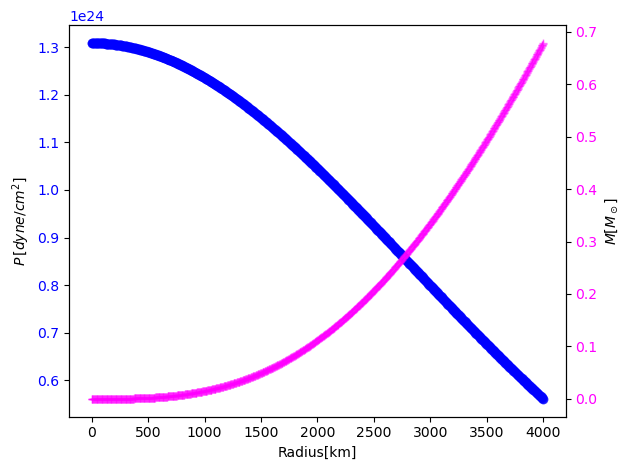

<Figure size 640x480 with 0 Axes>

In [21]:
fig, ax1 = plt.subplots()

ax1.plot(r/1e5, P, "o",color="blue", alpha=0.5)
ax1.set_xlabel('Radius[km]')
ax1.set_ylabel(r'$P\,[dyne/cm^2]$')
ax1.tick_params(axis='y', labelcolor="blue")



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel(r'$M[M_\odot]$')  # we already handled the x-label with ax1
ax2.plot(r/1e5,m_bar, "+",color='magenta', alpha=0.5)
ax2.tick_params(axis='y', labelcolor="magenta")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig("White_dwarf_Relativisc.pdf")

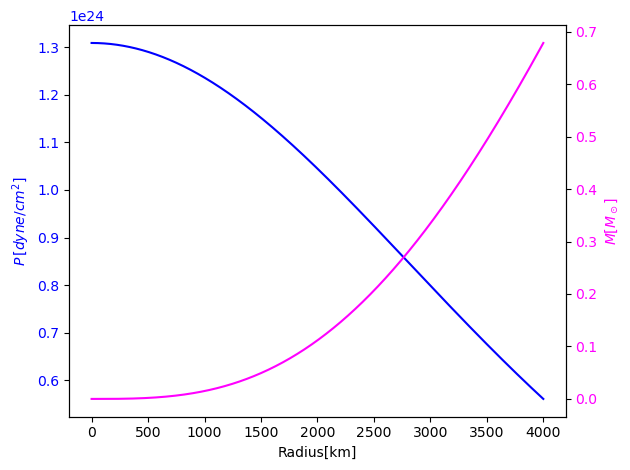

In [22]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Radius[km]')
ax1.set_ylabel(r'$P\,[dyne/cm^2]$', color='blue')
ax1.plot(r/1e5, P, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel(r'$M[M_\odot]$', color="magenta")  # we already handled the x-label with ax1
ax2.plot(r/1e5,m_bar, color='magenta')
ax2.tick_params(axis='y', labelcolor="magenta")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("White_dwarf_Relativisc.pdf")

### Comments:

One thing with the above calculation we notice that the mass is continously increasing with the the radius, that should not be the case. We need to implement proper algorithim to obtain exact M-R curve, where mass stop increasing. 


In [23]:
c=3*1e8 #m/s
R_WD=(2*G*m_bar*M_sun/1e3)/(c**2)
R_S_WD=R_WD/1e3 #km


In [24]:
R_S=(2*G*M_sun/1e3)/(c**2)
R_S/1e3 #km

2.9359395999999998

Let us look at the compactness of a star, which we defined as the ratio
of the gravitational mass to its radius

$$C=\frac{GM}{R}$$

In [25]:
density=np.linspace(1e3,5*1e6,1000)#gm/cm^3


In [26]:
P_R=EoS(density)

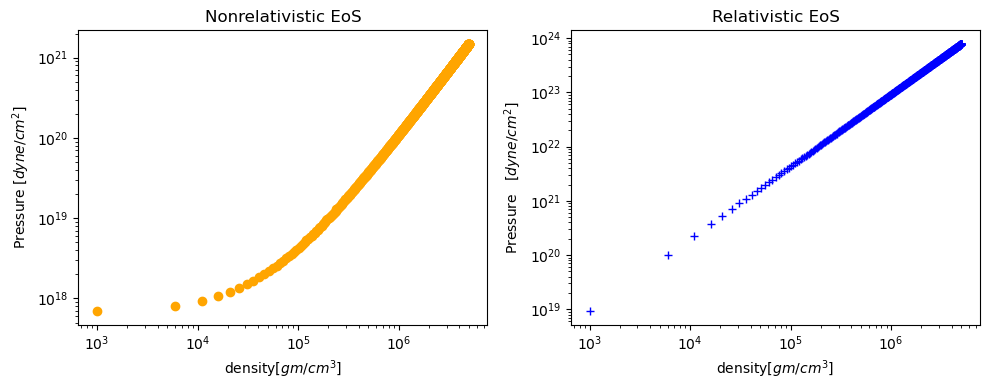

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].loglog()
axs[1].loglog()

axs[0].plot(density, P_NR,'o', color="orange")
axs[0].set_title('Nonrelativistic EoS')
axs[0].set_xlabel(r"density$[gm/cm^3]$")
axs[0].set_ylabel(r"Pressure$\,\,[dyne/cm^2]$")


plt.gca().invert_xaxis()

#axs[1].plot(density,P_R,'tab:red','o')

axs[1].plot(density,P_R,'+', color="blue")
axs[1].set_title('Relativistic EoS')
axs[1].set_xlabel(r"density$[gm/cm^3]$")
axs[1].set_ylabel(r"Pressure  $\,\,[dyne/cm^2]$")

plt.gca().invert_xaxis()

plt.tight_layout()




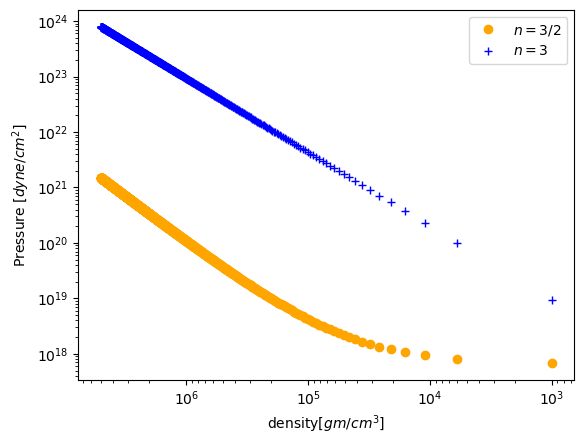

In [28]:
plt.loglog()
plt.plot(density, P_NR,'o', color="orange",label="$n={3}/{2}$")
plt.plot(density,P_R,'+', color="blue",label="$n={3}$")
plt.xlabel(r"density$[gm/cm^3]$")
plt.ylabel(r"Pressure$\,\,[dyne/cm^2]$")
plt.gca().invert_xaxis()
plt.legend()
plt.savefig("White_dwarf_pressure_profile.pdf")

# Speed of Sound 



# Approach 2

- Define a function for TOV and solve TOV for the range of values of densities. 
- This tells that for given range of densities, we will have pressure and energy density array.
- Calling the pressure and energy density array inside the solver and store result where mass stop increasing.
- include GR corrections for neutron star

As we can see that we have pressure and density arrays. Let's do the study for Relativistic White Dwarf

-$MeV/fm^3$ to $gm/cm^3$ conversion:

$$1 eV=1.6 \times 10^{-19} J$$
$$1 \,J=\frac{1\,eV}{1.6\times 10^{-19}}$$
$$E=mc^2=1 kg \times (3\times 10^8)^2 m^2/s^2=9\times 10^{16} \,J$$

That means 1 kg of materials produces $9\times 10^{16} J$ energy.

$$1 \,kg=9\times(10^{16}) \,J=\frac{9 \times(10^{16})}{1.6\times(10^{-19})} eV= \frac{9}{1.6}\times 10^{35}\,eV$$
$$ \boxed{1 kg=\frac{9}{1.6}\times 10^{29}\,MeV}$$
$$ 1 \,gm=\frac{9}{1.6}\times 10^{32}\,eV=\frac{9}{1.6}\times 10^{26}\,MeV$$
$$ \boxed{1 \, MeV=\frac{1.6}{9\times 10^{26}} \,gm}$$



Then $$MeV/fm^3= \frac{1.6 \,gm}{9\times {10^{26}}} \frac{1}{(10^{-15}m)^3}=\frac{1.6 \,gm}{9\times 10^{26}\times {10^{-45}}\times{10^6}cm^3}=1.777\times 10^{12} \frac{gm}{cm^3}$$




$$\boxed{1 \frac{gm}{cm^3}=\frac{1}{1.777\times 10^{12}}   \frac{MeV}{fm^3}}$$


- $\frac{MeV}{fm^3}$ to $\frac{dyne}{cm^2}$ conversion:

$$W=F\cdot S$$
$$J=N \cdot m$$
$$N=
\frac{J}{m}=\frac{1}{1.6\times{10^{-19}}}\frac{eV}{m}$$


$$10^5\, dyne=\frac{1}{1.6\times{10^{-19}}}\frac{eV}{10^2 \,cm}$$
$$\boxed{1 \,eV=1.6\times{10^{-12}} dyne \cdot cm}$$



$$\frac{MeV}{fm^3}=\frac{10^6 eV}{10^{-39} cm^3}=\frac{10^6\times  1.6\times{10^{-12}} dyne \cdot cm}{10^{-39} cm^3}=1.6\times{10^{33}}\frac{dyne}{cm^2}$$
$$\boxed{\frac{dyne}{cm^2}=\frac{1}{1.6\times{10^{33}}}\frac{MeV}{fm^3}}$$

In [29]:
factor1=1/(1.777*1e12) #gm/cm^3 to MeV/fm^3
factor2=1/(1.6*1e33) #dyne/cm^2 to MeV/fm^3

In [30]:
den_arr=density #gm/cm^3

en_arr=den_arr*factor1 # density in MeV/fm^3


P_R=P_R*factor2 #relativistic pressure in MeV/fm^3
P_NR=P_NR*factor2 #non relativistic pressure in MeV/fm^3

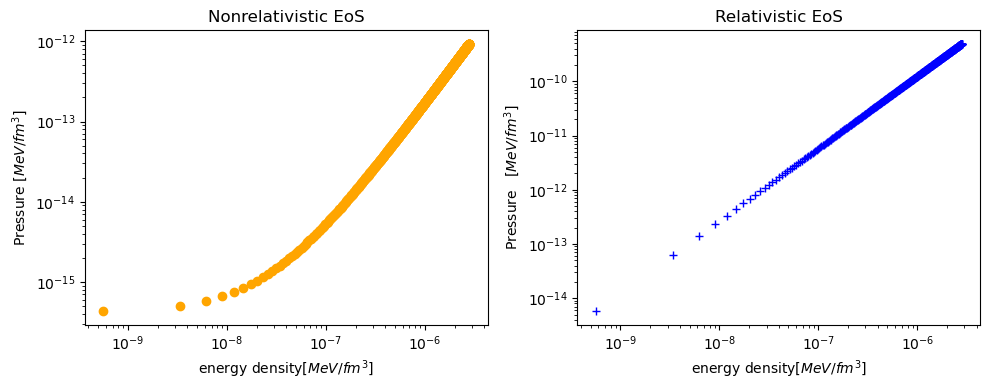

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].loglog()
axs[1].loglog()

axs[0].plot(en_arr, P_NR,'o', color="orange")
axs[0].set_title('Nonrelativistic EoS')
axs[0].set_xlabel(r"energy density$[MeV/fm^3]$")
axs[0].set_ylabel(r"Pressure$\,\,[MeV/fm^3]$")
plt.gca().invert_xaxis()

#axs[1].plot(density,P_R,'tab:red','o')

axs[1].plot(en_arr,P_R,'+', color="blue")
axs[1].set_title('Relativistic EoS')
axs[1].set_xlabel(r"energy density$[MeV/fm^3]$")
axs[1].set_ylabel(r"Pressure  $\,\,[MeV/fm^3]$")

plt.gca().invert_xaxis()
plt.tight_layout()


In [32]:
from scipy.interpolate import interp1d

p_arr=P_R

sort_ind = np.argsort(p_arr)
en_dens = interp1d(p_arr[sort_ind], en_arr[sort_ind], kind='cubic',fill_value="extrapolate")

sort_ind = np.argsort(en_arr)
press = interp1d(en_arr[sort_ind], p_arr[sort_ind], kind='cubic',fill_value="extrapolate")

    

min_dens = np.min(en_arr)
max_dens = np.max(en_arr)

min_p = np.min(p_arr)
max_p = np.max(p_arr)

In [33]:

min_dens 

5.627462014631402e-10

In [34]:
max_dens

2.813731007315701e-06

In [35]:
G=6.67*1e-17 #N km^2/kg^2
M_sun=1.98*1e30 #kg
c=1

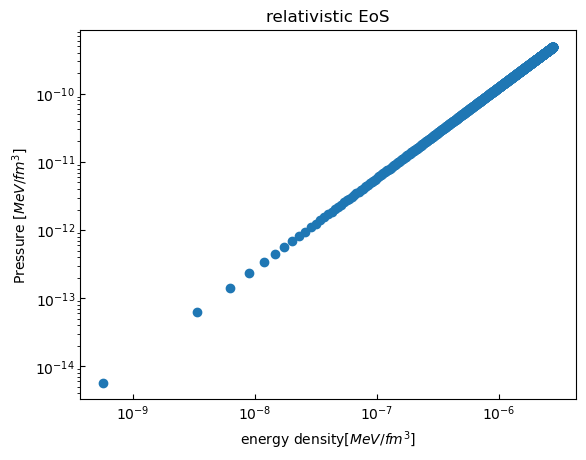

In [36]:
#Pressure density plot from interpolation

c_dens=density
c_dens=c_dens*factor1 #MeV/fm^3
fig,ax=plt.subplots()
ax.loglog()
ax.plot(c_dens,press(c_dens),"o")
plt.title('relativistic EoS')
ax.set_xlabel(r"energy density$[MeV/fm^3]$")
ax.set_ylabel(r"Pressure$\,\,[MeV/fm^3]$")
#ax.tick_params(direction='in', length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.tick_params(axis='x', which='minor', bottom=False)

In [37]:
dataset = pd.DataFrame({'Energy[Mev/fm^3]':c_dens , 'Pressure[MeV/fm^3]': press(c_dens)})

In [38]:
dataset

,Energy[Mev/fm^3],Pressure[MeV/fm^3]
0,5.627462e-10,5.776840e-15
1,3.378730e-09,6.303933e-14
2,6.194715e-09,1.414605e-13
3,9.010699e-09,2.331407e-13
4,1.182668e-08,3.350355e-13
...,...,...
995,2.802467e-06,4.912783e-10
996,2.805283e-06,4.919366e-10
997,2.808099e-06,4.925951e-10
998,2.810915e-06,4.932539e-10


In [39]:
'''df=dataset

#specify path for export
path = r'/Users/tousif/Desktop/Research_2022/Programs/white_dwarf_eos_NR.txt'

#export DataFrame to text file
with open(path, 'a') as f:
    df_string = df.to_string(header=True, index=False)
    f.write(df_string)''';

In [40]:
df = pd.DataFrame(dataset)

# Save the dataframe to a CSV file
df.to_csv('white_dwarfs_data_R.csv', index=False)

In [41]:
#creating dataset
'''import pandas as pd
dataset = pd.DataFrame()
dataset['Energy[Mev/fm^3]'] = c_dens.tolist()
dataset['Pressure[MeV/fm^3]'] = press(c_dens).tolist()
np.savetxt(r'white_dwarfs_eos_NR.txt', dataset.values,fmt='%d', delimiter='\t')''';